In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
fileURL = './crime_data_latest.csv'
crime_data = pd.read_csv(fileURL, header=0)

In [3]:
crime_data.shape

(399805, 17)

In [4]:
crime_data = crime_data.fillna(0)
crime_data.head(15)

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I192050013,2403,Disorderly Conduct,DISTURBING THE PEACE,C11,341,0,6/30/2019 23:55,2019,6,Sunday,23,Part Two,BOWDOIN ST,42.305740,-71.067624,"(42.30573977, -71.06762362)"
1,I192050013,2405,Disorderly Conduct,DISORDERLY CONDUCT,C11,341,0,6/30/2019 23:55,2019,6,Sunday,23,Part Two,BOWDOIN ST,42.305740,-71.067624,"(42.30573977, -71.06762362)"
2,I192050019,3503,Missing Person Located,MISSING PERSON - NOT REPORTED - LOCATED,B2,319,0,6/30/2019 23:30,2019,6,Sunday,23,Part Three,CHENEY ST,42.309700,-71.085824,"(42.30970016, -71.08582414)"
3,I192050009,3115,Investigate Person,INVESTIGATE PERSON,B3,418,0,6/30/2019 23:17,2019,6,Sunday,23,Part Three,FULLER ST,42.280093,-71.080054,"(42.28009279, -71.08005410)"
4,I192050004,3501,Missing Person Reported,MISSING PERSON,C6,175,0,6/30/2019 23:17,2019,6,Sunday,23,Part Three,SOUTHAMPTON ST,42.332108,-71.070144,"(42.33210843, -71.07014395)"
5,I192050006,3001,Medical Assistance,DEATH INVESTIGATION,A1,111,0,6/30/2019 23:10,2019,6,Sunday,23,Part Three,WASHINGTON ST,42.353581,-71.062367,"(42.35358129, -71.06236665)"
6,I192050006,3007,Medical Assistance,SUDDEN DEATH,A1,111,0,6/30/2019 23:10,2019,6,Sunday,23,Part Three,WASHINGTON ST,42.353581,-71.062367,"(42.35358129, -71.06236665)"
7,I192052344,619,Larceny,LARCENY ALL OTHERS,D4,624,0,6/30/2019 22:45,2019,6,Sunday,22,Part One,LANSDOWNE ST,42.347174,-71.096444,"(42.34717363, -71.09644390)"
8,I192050141,1402,Vandalism,VANDALISM,C11,392,0,6/30/2019 22:30,2019,6,Sunday,22,Part Two,BATESWELL RD,0.000000,0.000000,"(0.00000000, 0.00000000)"
9,I192050000,3410,Towed,TOWED MOTOR VEHICLE,D4,594,0,6/30/2019 22:27,2019,6,Sunday,22,Part Three,MASSACHUSETTS AVE,42.341870,-71.083722,"(42.34186952, -71.08372190)"


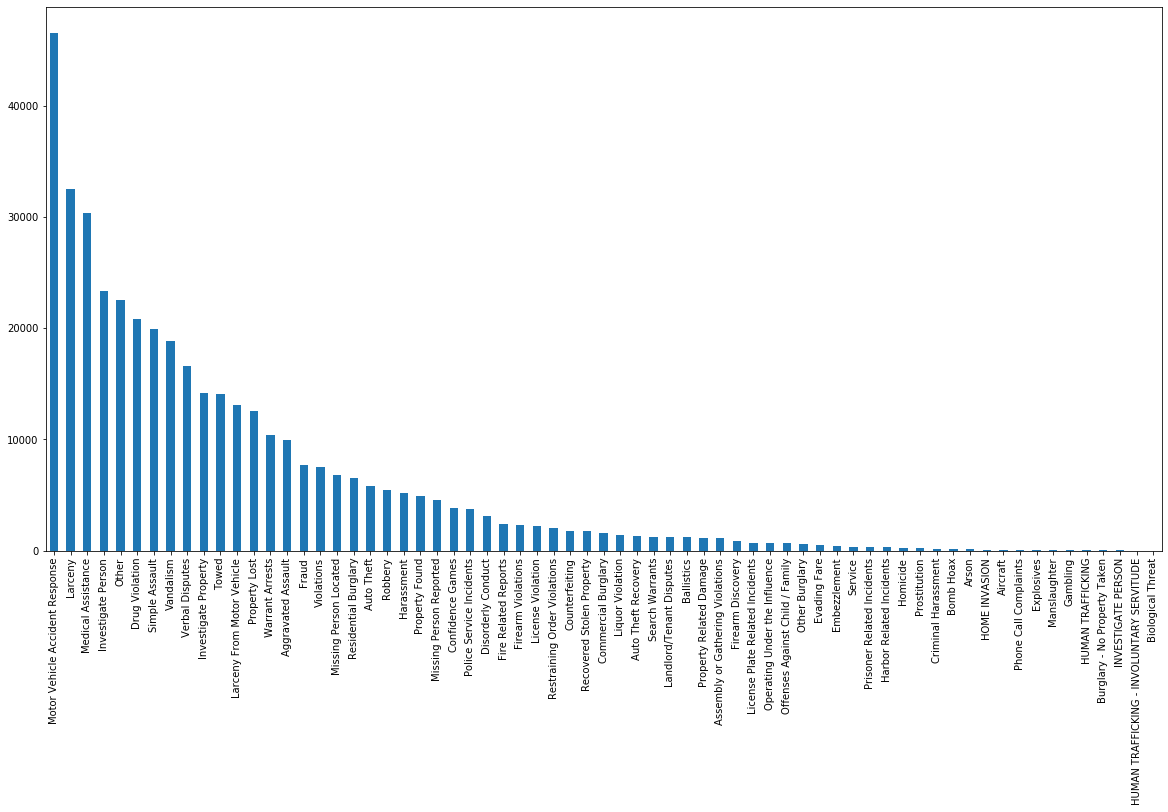

In [5]:
pd.value_counts(crime_data.OFFENSE_CODE_GROUP).plot.bar(figsize=(20,10))

In [6]:
pd.value_counts(crime_data.STREET).head(10).drop(0)

WASHINGTON ST        18133
BLUE HILL AVE         9866
BOYLSTON ST           9002
DORCHESTER AVE        6336
TREMONT ST            6113
MASSACHUSETTS AVE     5915
HARRISON AVE          5915
CENTRE ST             5543
COMMONWEALTH AVE      5214
Name: STREET, dtype: int64

In [7]:
pd.value_counts(crime_data.SHOOTING)

0    398191
Y      1614
Name: SHOOTING, dtype: int64

In [8]:
# Year and crime type stats

crime_data.groupby(['OFFENSE_CODE_GROUP','YEAR']).size()

OFFENSE_CODE_GROUP                YEAR
Aggravated Assault                2015    1415
                                  2016    2399
                                  2017    2451
                                  2018    2483
                                  2019    1168
Aircraft                          2015       4
                                  2016       4
                                  2017      22
                                  2018      18
                                  2019       7
Arson                             2015      11
                                  2016      34
                                  2017      32
                                  2018      18
                                  2019      12
Assembly or Gathering Violations  2015     240
                                  2016     334
                                  2017     243
                                  2018     199
                                  2019      88
Auto Theft           

In [9]:
# Filtering part one crimes and then getting its stats

part_one_crime = crime_data[crime_data.UCR_PART == 'Part One']
part_one_crime.groupby(['OFFENSE_CODE_GROUP','YEAR']).size()

OFFENSE_CODE_GROUP          YEAR
Aggravated Assault          2015    1415
                            2016    2399
                            2017    2451
                            2018    2483
                            2019    1168
Auto Theft                  2015     988
                            2016    1543
                            2017    1398
                            2018    1339
                            2019     541
Commercial Burglary         2015     261
                            2016     431
                            2017     433
                            2018     318
                            2019     152
Homicide                    2015      40
                            2016      56
                            2017      67
                            2018      70
                            2019      31
Larceny                     2015    5030
                            2016    7926
                            2017    7825
                        

In [10]:
# Crime data of Part One crimes based on streets

part_one_crime.groupby(['OFFENSE_CODE_GROUP','YEAR','STREET']).size()

OFFENSE_CODE_GROUP  YEAR  STREET                 
Aggravated Assault  2015  0                          44
                           ALBANY ST                  2
                           COMMONWEALTH AVE           1
                          132 BROOK AVE               1
                          ACADEMY TER                 3
                          ACKLEY PL                   1
                          ADAMS ST                    7
                          ALBANY ST                   2
                          ALBION ST                   1
                          ALDRICH ST                  1
                          ALLSTATE RD                 5
                          ALLSTON ST                  2
                          ALMONT ST                   3
                          ALPHA RD                    3
                          ALPINE ST                   2
                          AMERICAN LEGION HWY         3
                          AMORY ST                    

In [11]:
data_15_16 = crime_data[((crime_data.YEAR == 2015) & (crime_data.MONTH >= 1)) | ((crime_data.YEAR == 2016) & (crime_data.MONTH <= 6))]
data_16_17 = crime_data[((crime_data.YEAR == 2016) & (crime_data.MONTH >= 7)) | ((crime_data.YEAR == 2017) & (crime_data.MONTH <= 6))]
data_17_18 = crime_data[((crime_data.YEAR == 2017) & (crime_data.MONTH >= 7)) | ((crime_data.YEAR == 2018) & (crime_data.MONTH <= 6))]
data_18_19 = crime_data[((crime_data.YEAR == 2018) & (crime_data.MONTH >= 7)) | ((crime_data.YEAR == 2019) & (crime_data.MONTH <= 6))]

In [14]:
part_one_crime

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
7,I192052344,619,Larceny,LARCENY ALL OTHERS,D4,624,0,6/30/2019 22:45,2019,6,Sunday,22,Part One,LANSDOWNE ST,42.347174,-71.096444,"(42.34717363, -71.09644390)"
13,I192050072,614,Larceny From Motor Vehicle,LARCENY THEFT FROM MV - NON-ACCESSORY,E5,686,0,6/30/2019 22:00,2019,6,Sunday,22,Part One,MONTVALE ST,0.000000,0.000000,"(0.00000000, 0.00000000)"
14,I192050072,724,Auto Theft,AUTO THEFT,E5,686,0,6/30/2019 22:00,2019,6,Sunday,22,Part One,MONTVALE ST,0.000000,0.000000,"(0.00000000, 0.00000000)"
19,I192049996,613,Larceny,LARCENY SHOPLIFTING,D4,627,0,6/30/2019 21:17,2019,6,Sunday,21,Part One,KILMARNOCK ST,42.343535,-71.099801,"(42.34353469, -71.09980109)"
27,I192049978,619,Larceny,LARCENY ALL OTHERS,A1,,0,6/30/2019 20:37,2019,6,Sunday,20,Part One,CAMBRIDGE ST,0.000000,0.000000,"(0.00000000, 0.00000000)"
29,I192049977,520,Residential Burglary,BURGLARY - RESIDENTIAL - FORCE,B2,586,0,6/30/2019 20:34,2019,6,Sunday,20,Part One,TERRACE PL,0.000000,0.000000,"(0.00000000, 0.00000000)"
31,I192050049,614,Larceny From Motor Vehicle,LARCENY THEFT FROM MV - NON-ACCESSORY,B3,456,0,6/30/2019 20:15,2019,6,Sunday,20,Part One,GLENWAY ST,42.300190,-71.082443,"(42.30018979, -71.08244261)"
39,I192049973,617,Larceny,LARCENY THEFT FROM BUILDING,D14,793,0,6/30/2019 19:48,2019,6,Sunday,19,Part One,COMMONWEALTH AVE,42.349378,-71.132490,"(42.34937839, -71.13249037)"
41,I192049957,614,Larceny From Motor Vehicle,LARCENY THEFT FROM MV - NON-ACCESSORY,E18,522,0,6/30/2019 19:37,2019,6,Sunday,19,Part One,DACY ST,0.000000,0.000000,"(0.00000000, 0.00000000)"
42,I192050056,706,Auto Theft,AUTO THEFT - MOTORCYCLE / SCOOTER,D4,156,0,6/30/2019 19:30,2019,6,Sunday,19,Part One,MASSACHUSETTS AVE,0.000000,0.000000,"(0.00000000, 0.00000000)"


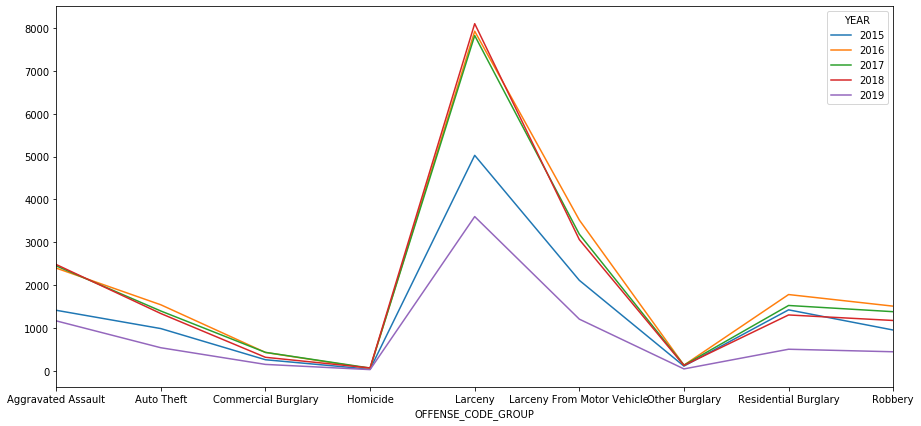

In [46]:
# A plot to represent the data of crimes of part one over the years

fig, ax = plt.subplots(figsize=(15,7))
part_one_crime.groupby(['OFFENSE_CODE_GROUP','YEAR']).count()['INCIDENT_NUMBER'].unstack().plot(ax=ax)

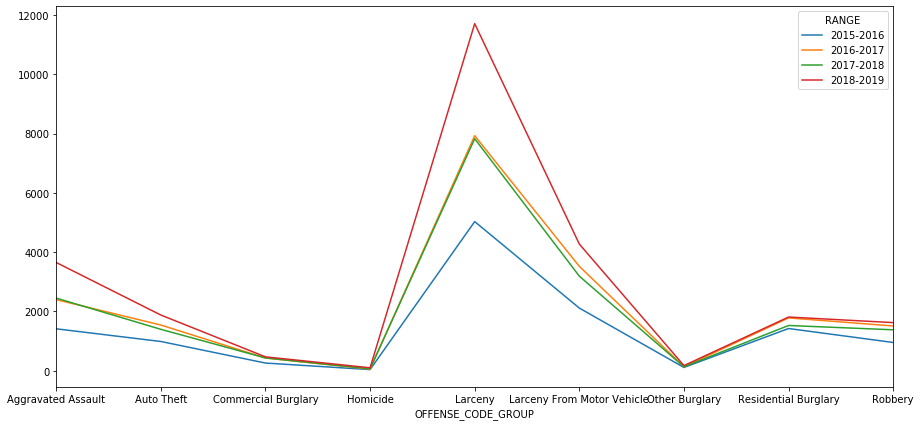

In [65]:
# Added a new column named range for easier further use.

crime_data['RANGE'] = '0'
crime_data.loc[((crime_data.YEAR == 2015) & (crime_data.MONTH >= 1)) | ((crime_data.YEAR == 2016) & (crime_data.MONTH <= 6)),'RANGE'] = '2015-2016'
crime_data.loc[((crime_data.YEAR == 2016) & (crime_data.MONTH >= 1)) | ((crime_data.YEAR == 2017) & (crime_data.MONTH <= 6)),'RANGE'] = '2016-2017'
crime_data.loc[((crime_data.YEAR == 2017) & (crime_data.MONTH >= 1)) | ((crime_data.YEAR == 2018) & (crime_data.MONTH <= 6)),'RANGE'] = '2017-2018'
crime_data.loc[((crime_data.YEAR == 2018) & (crime_data.MONTH >= 1)) | ((crime_data.YEAR == 2019) & (crime_data.MONTH <= 6)),'RANGE'] = '2018-2019'

part_one_crime_range = crime_data[crime_data.UCR_PART == 'Part One']

fig, ax = plt.subplots(figsize=(15,7))
part_one_crime_range.groupby(['OFFENSE_CODE_GROUP','RANGE']).count()['INCIDENT_NUMBER'].unstack().plot(ax=ax)